In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Primer dataset

Para la primera red neuronal vamos a escoger el dataset fashion mnist, que contiene imagenes de prendas de ropa.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape
# 60000 imagenes de 28x28 pixeles

(60000, 28, 28)

In [5]:
type(train_images)

numpy.ndarray

In [6]:
#para ver un pixel
train_images[0,23,23]

194

El valor en la escala de grises va de 0 a 255 (negro a blanco)

In [7]:
train_labels[:10]
# hay 10 tipos distintos de ropa

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [8]:
# los nombres de cada label
class_names = ['T-shirt/Top', 'Trouser','Pullover','Dress', 'Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle Boot']

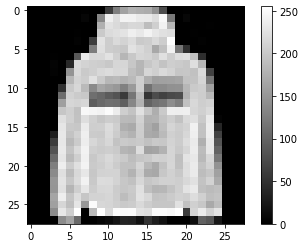

In [12]:
plt.figure()
plt.imshow(train_images[1910], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()

### Preprocesado de datos

In [17]:
np.isnan(train_images).any()

False

No hay valores nulos, asi que podemos proceder a escalar todos los valores entre 0 y 1 para que sea más fácil para el modelo.

In [18]:
train_images = train_images / 255
test_images = test_images / 255

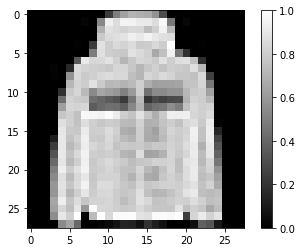

In [19]:
plt.figure()
plt.imshow(train_images[1910], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()
# vemos en la barra lateral que los valores de los pixeles van entre
# 0 y 1

### Construcción del modelo

Vamos a construir la NN de modo que pase datos de derecha a izquierda, de manera Secuencial. Para ello definimos con keras las tres capas de la red, el input, las hidden y el output.

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),   # input layer
    keras.layers.Dense(128, activation='relu'),  # hidden layer
    keras.layers.Dense(10, activation='softmax') # output
])

Al principio aplanamos los input, luego definimos las otras capas como densas por estar todas conectadas con todas. Los nodos (128) se eligen al "azar" de momento. Las neuronas output se eligen como 10 porque es el número de labels que queremos predecir

#### Compilar el modelo

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# estos hiperparametros los elegimos nosotros. Para optimizar se podría
# hacer un GridSearchCV

### Entrenar el modelo

In [29]:
# no hace falta la funcion de input
model.fit(train_images, train_labels, epochs=3)
# cambiar las epochs tambien es optimización de hiperparametros

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1791 - accuracy: 0.9332
Epoch 2/3
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1740 - accuracy: 0.9345
Epoch 3/3
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1700 - accuracy: 0.9366


### Evaluar el modelo

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 61us/sample - loss: 0.3617 - accuracy: 0.8911
Test accuracy: 0.8911


Parece que el modelo ha hecho algo de overfitting

### Hacer predicciones

In [31]:
predictions = model.predict(test_images)

In [33]:
predictions.shape, test_labels.shape

((10000, 10), (10000,))

La funcion predict saca un array para cada input de las probabilidades

In [48]:
index = 0
for i in predictions:
    print(class_names[i.argmax()],",", class_names[test_labels[index]])
    index += 1

Ankle Boot , Ankle Boot
Pullover , Pullover
Trouser , Trouser
Trouser , Trouser
Shirt , Shirt
Trouser , Trouser
Coat , Coat
Shirt , Shirt
Sandal , Sandal
Sneaker , Sneaker
Coat , Coat
Sandal , Sandal
Sandal , Sneaker
Dress , Dress
Coat , Coat
Trouser , Trouser
Pullover , Pullover
Pullover , Coat
Bag , Bag
T-shirt/Top , T-shirt/Top
Pullover , Pullover
Sandal , Sandal
Sneaker , Sneaker
Sandal , Ankle Boot
Trouser , Trouser
Coat , Coat
Shirt , Shirt
T-shirt/Top , T-shirt/Top
Ankle Boot , Ankle Boot
Coat , Dress
Bag , Bag
Bag , Bag
Dress , Dress
Dress , Dress
Bag , Bag
T-shirt/Top , T-shirt/Top
Sneaker , Sneaker
Sandal , Sandal
Sneaker , Sneaker
Ankle Boot , Ankle Boot
T-shirt/Top , Shirt
Trouser , Trouser
T-shirt/Top , Dress
Sneaker , Sneaker
Shirt , Shirt
Sneaker , Sneaker
Pullover , Pullover
Trouser , Trouser
Pullover , Pullover
Shirt , Pullover
Coat , Coat
Pullover , Coat
Sandal , Sandal
Bag , Bag
Pullover , Pullover
Pullover , Pullover
Bag , Bag
Coat , Coat
Bag , Bag
T-shirt/Top , T-s

Coat , Pullover
T-shirt/Top , T-shirt/Top
Sneaker , Sneaker
T-shirt/Top , Dress
Bag , Bag
T-shirt/Top , T-shirt/Top
Ankle Boot , Ankle Boot
Sneaker , Sneaker
Shirt , Shirt
Trouser , Trouser
Shirt , Pullover
Pullover , Shirt
Coat , Coat
Bag , Bag
T-shirt/Top , T-shirt/Top
Shirt , Shirt
Dress , Dress
Shirt , Shirt
Bag , Bag
Coat , Coat
T-shirt/Top , T-shirt/Top
Bag , Bag
Ankle Boot , Ankle Boot
Pullover , Pullover
Coat , Coat
Sandal , Sandal
Ankle Boot , Ankle Boot
Trouser , Trouser
Coat , Coat
Coat , Coat
Ankle Boot , Ankle Boot
Pullover , Pullover
Trouser , Trouser
Sneaker , Sneaker
Ankle Boot , Ankle Boot
Sandal , Sandal
Bag , Bag
Dress , Trouser
Sneaker , Sneaker
Sneaker , Sneaker
Trouser , Trouser
Trouser , Trouser
Trouser , Trouser
Pullover , Shirt
Ankle Boot , Ankle Boot
Sandal , Sandal
Dress , Dress
Bag , Bag
Coat , Coat
Coat , Pullover
Ankle Boot , Sneaker
Pullover , Coat
Bag , Bag
Dress , Dress
Pullover , Pullover
Coat , Coat
Coat , Coat
Sneaker , Sneaker
Trouser , Trouser
Coat

Ankle Boot , Ankle Boot
Coat , Coat
Trouser , Trouser
Shirt , Shirt
Sandal , Sandal
Pullover , Pullover
Sneaker , Sneaker
Bag , Bag
Sandal , Sandal
Shirt , Dress
Bag , Bag
Sandal , Sandal
Pullover , Coat
Pullover , Pullover
Bag , Bag
Ankle Boot , Ankle Boot
Bag , Bag
Coat , Coat
Dress , Dress
T-shirt/Top , Dress
Bag , Bag
Bag , Bag
Dress , Pullover
T-shirt/Top , T-shirt/Top
Ankle Boot , Ankle Boot
Coat , Coat
Coat , Coat
Bag , Bag
Trouser , Trouser
Dress , Dress
Shirt , Shirt
Trouser , Trouser
Ankle Boot , Ankle Boot
Pullover , Pullover
Trouser , Trouser
Shirt , Shirt
Pullover , Pullover
Sneaker , Sneaker
Ankle Boot , Ankle Boot
Coat , Coat
Shirt , Shirt
T-shirt/Top , T-shirt/Top
Coat , Coat
Coat , Coat
Pullover , Pullover
Coat , Coat
Sandal , Sandal
T-shirt/Top , T-shirt/Top
Pullover , Pullover
Bag , Bag
Dress , Dress
Sneaker , Sneaker
Shirt , Shirt
Coat , Coat
T-shirt/Top , T-shirt/Top
T-shirt/Top , T-shirt/Top
Sandal , Sandal
Coat , Pullover
Bag , Bag
Pullover , Pullover
Shirt , Coa

Pullover , Pullover
Sneaker , Sneaker
T-shirt/Top , T-shirt/Top
Ankle Boot , Ankle Boot
Ankle Boot , Ankle Boot
Dress , Dress
Trouser , Trouser
Sandal , Sandal
Ankle Boot , Ankle Boot
Dress , Dress
Trouser , Trouser
T-shirt/Top , T-shirt/Top
Dress , Dress
Dress , Dress
Sandal , Sandal
Ankle Boot , Ankle Boot
Sneaker , Sneaker
Ankle Boot , Ankle Boot
Bag , Bag
Trouser , Dress
Sandal , Sandal
Ankle Boot , Ankle Boot
Dress , Dress
Sneaker , Sneaker
Ankle Boot , Ankle Boot
Dress , Dress
Pullover , Coat
Shirt , Shirt
T-shirt/Top , Shirt
Sandal , Sandal
Sneaker , Sneaker
Sneaker , Sneaker
Pullover , Shirt
Dress , Dress
Sandal , Sandal
Dress , Dress
Trouser , Trouser
Trouser , Trouser
Ankle Boot , Ankle Boot
Coat , Coat
Dress , Dress
Ankle Boot , Ankle Boot
Sandal , Sandal
Sandal , Sandal
Sneaker , Sneaker
Pullover , Pullover
Coat , Coat
Ankle Boot , Ankle Boot
T-shirt/Top , T-shirt/Top
Pullover , Pullover
Trouser , Trouser
Ankle Boot , Ankle Boot
Sneaker , Sneaker
Trouser , Trouser
Sandal , 

Dress , Dress
T-shirt/Top , T-shirt/Top
Sneaker , Sneaker
Bag , Bag
Sneaker , Sneaker
Shirt , Shirt
Sandal , Sandal
Pullover , Pullover
Shirt , Shirt
Sneaker , Sneaker
Sandal , Sandal
Sandal , Sandal
Bag , Bag
Ankle Boot , Ankle Boot
Sneaker , Sneaker
Dress , Dress
Pullover , Pullover
Coat , Coat
Bag , Bag
Dress , Dress
Ankle Boot , Ankle Boot
Sandal , Sandal
Sneaker , Sneaker
Shirt , Shirt
Pullover , Pullover
Pullover , Shirt
Sneaker , Sneaker
T-shirt/Top , Dress
Bag , Bag
Sandal , Sandal
Trouser , Trouser
Bag , Bag
Ankle Boot , Ankle Boot
Pullover , Pullover
Pullover , Shirt
Trouser , Trouser
Shirt , Coat
Pullover , Pullover
Sneaker , Sneaker
Coat , Coat
T-shirt/Top , T-shirt/Top
Coat , Coat
Coat , Coat
Bag , Bag
Ankle Boot , Ankle Boot
Sneaker , Sneaker
Ankle Boot , Ankle Boot
Pullover , Pullover
Pullover , Shirt
Bag , Bag
Coat , Pullover
Shirt , Shirt
T-shirt/Top , T-shirt/Top
Shirt , Shirt
Dress , Dress
Coat , Coat
Trouser , Trouser
Sandal , Sandal
Pullover , Shirt
Sneaker , Sneak

Sandal , Sandal
Ankle Boot , Ankle Boot
Sandal , Sandal
Coat , Coat
T-shirt/Top , Shirt
Sneaker , Sneaker
Dress , Dress
Sandal , Sandal
Coat , Coat
Pullover , Pullover
Shirt , Dress
Ankle Boot , Ankle Boot
Coat , Coat
Bag , Bag
Trouser , Trouser
Ankle Boot , Ankle Boot
Pullover , Pullover
Shirt , Shirt
Pullover , Pullover
Coat , Coat
Bag , Bag
Bag , Bag
Sneaker , Sneaker
Sneaker , Sneaker
Coat , Dress
Ankle Boot , Ankle Boot
Dress , Dress
Ankle Boot , Ankle Boot
Shirt , Shirt
Bag , Bag
Pullover , Pullover
Shirt , Shirt
Ankle Boot , Ankle Boot
T-shirt/Top , T-shirt/Top
Coat , Coat
Pullover , Coat
Sandal , Sandal
Sandal , Sneaker
T-shirt/Top , T-shirt/Top
Coat , Coat
Shirt , Shirt
Coat , Coat
Trouser , Trouser
Dress , Dress
Trouser , Trouser
Bag , Shirt
Sneaker , Sneaker
Bag , Bag
Bag , Bag
Ankle Boot , Ankle Boot
Sneaker , Sneaker
T-shirt/Top , T-shirt/Top
Sandal , Sandal
Sneaker , Sneaker
Dress , Dress
Shirt , Shirt
T-shirt/Top , T-shirt/Top
Coat , Coat
T-shirt/Top , T-shirt/Top
Dress 

Trouser , Trouser
T-shirt/Top , T-shirt/Top
Pullover , Pullover
Shirt , Shirt
Pullover , Pullover
T-shirt/Top , T-shirt/Top
Dress , Dress
Sneaker , Sneaker
Sandal , Sandal
T-shirt/Top , T-shirt/Top
Shirt , Shirt
Pullover , Pullover
T-shirt/Top , Shirt
Bag , Bag
Pullover , Coat
Pullover , Pullover
Trouser , Trouser
Bag , Bag
Pullover , Shirt
Bag , Bag
Pullover , Pullover
Ankle Boot , Ankle Boot
Pullover , Pullover
Shirt , Shirt
Bag , Bag
Sandal , Sandal
Pullover , Pullover
Sneaker , Sneaker
Trouser , Dress
Pullover , Pullover
Pullover , Pullover
Shirt , Shirt
T-shirt/Top , Coat
Shirt , Shirt
Bag , Bag
Sandal , Sandal
Pullover , Pullover
Trouser , Trouser
Sandal , Sandal
Pullover , Pullover
Bag , Bag
Pullover , Pullover
Ankle Boot , Ankle Boot
T-shirt/Top , T-shirt/Top
Shirt , Shirt
Dress , Dress
Shirt , Shirt
Coat , Coat
Pullover , Shirt
Sneaker , Sneaker
Sneaker , Sneaker
Ankle Boot , Ankle Boot
T-shirt/Top , Shirt
Shirt , Coat
Ankle Boot , Ankle Boot
Bag , Bag
T-shirt/Top , T-shirt/To

T-shirt/Top , T-shirt/Top
Trouser , Trouser
Sandal , Sandal
Dress , Dress
Dress , Dress
Dress , Dress
Dress , Dress
Coat , Coat
Coat , Coat
Dress , Dress
T-shirt/Top , Shirt
Sneaker , Sneaker
Bag , Bag
T-shirt/Top , T-shirt/Top
Ankle Boot , Ankle Boot
Shirt , Shirt
Dress , Dress
T-shirt/Top , T-shirt/Top
Coat , Coat
Pullover , Pullover
Sneaker , Sneaker
Coat , Dress
Sandal , Sandal
Sneaker , Sneaker
Dress , Dress
Sneaker , Sneaker
Bag , Bag
Coat , Coat
Shirt , Shirt
Pullover , Pullover
Pullover , Pullover
Dress , Dress
Trouser , Trouser
T-shirt/Top , T-shirt/Top
Sneaker , Sneaker
Sandal , Sandal
Pullover , Shirt
Shirt , Shirt
Coat , Coat
Trouser , Trouser
Trouser , Trouser
Coat , Coat
Sneaker , Sneaker
Pullover , Pullover
Dress , Dress
Sandal , Sandal
Sandal , Sandal
T-shirt/Top , T-shirt/Top
Coat , Coat
Coat , Coat
Coat , Coat
Bag , Bag
Ankle Boot , Ankle Boot
Ankle Boot , Ankle Boot
Pullover , Pullover
T-shirt/Top , Shirt
Ankle Boot , Ankle Boot
Bag , Bag
Dress , Dress
Sandal , Sanda

T-shirt/Top , T-shirt/Top
Sneaker , Sneaker
Sneaker , Sneaker
Coat , Coat
Bag , Bag
Ankle Boot , Ankle Boot
Shirt , T-shirt/Top
Trouser , Trouser
Sandal , Sandal
Coat , Coat
Ankle Boot , Ankle Boot
Coat , Coat
Sneaker , Sneaker
Ankle Boot , Ankle Boot
Ankle Boot , Ankle Boot
Sneaker , Sneaker
T-shirt/Top , T-shirt/Top
Trouser , Trouser
T-shirt/Top , T-shirt/Top
Ankle Boot , Ankle Boot
Ankle Boot , Ankle Boot
Sandal , Sandal
Trouser , Trouser
Sneaker , Sneaker
Pullover , Pullover
Ankle Boot , Ankle Boot
Trouser , Trouser
Sandal , Sandal
Shirt , Shirt
Bag , Bag
Trouser , Trouser
Sneaker , Sneaker
Dress , Dress
Dress , T-shirt/Top
Bag , Bag
Pullover , Coat
Sneaker , Sneaker
T-shirt/Top , T-shirt/Top
Bag , Bag
Ankle Boot , Ankle Boot
Bag , Bag
Bag , Bag
Coat , Coat
Sandal , Sandal
Shirt , Shirt
Coat , Coat
Sandal , Sandal
Ankle Boot , Ankle Boot
T-shirt/Top , T-shirt/Top
T-shirt/Top , T-shirt/Top
Sandal , Sandal
Dress , Dress
Sneaker , Sneaker
Sneaker , Sneaker
Coat , Coat
Coat , Coat
Snea

Pullover , Pullover
Coat , Coat
Pullover , Pullover
Pullover , Pullover
Dress , Dress
Pullover , Pullover
Dress , Dress
T-shirt/Top , T-shirt/Top
Bag , Bag
Dress , Dress
Sandal , Sandal
Trouser , Trouser
Pullover , Pullover
Dress , Bag
Bag , Bag
Pullover , Pullover
Trouser , Trouser
Pullover , Pullover
Trouser , Trouser
Trouser , Trouser
Ankle Boot , Ankle Boot
Shirt , Shirt
Sandal , Sandal
Ankle Boot , Ankle Boot
T-shirt/Top , Shirt
Bag , Bag
T-shirt/Top , T-shirt/Top
Dress , Dress
Shirt , Shirt
Dress , Dress
Shirt , Trouser
Dress , Dress
Sneaker , Sneaker
Sandal , Sandal
Shirt , Shirt
Trouser , Trouser
Trouser , Trouser
Pullover , Pullover
T-shirt/Top , T-shirt/Top
Sandal , Sandal
Sandal , Sandal
T-shirt/Top , T-shirt/Top
Trouser , Trouser
T-shirt/Top , Shirt
Sandal , Sandal
Pullover , Pullover
Bag , Bag
Ankle Boot , Ankle Boot
Sneaker , Sneaker
Ankle Boot , Ankle Boot
Trouser , Trouser
Trouser , Trouser
Dress , Dress
Dress , Dress
Sandal , Sandal
Shirt , Shirt
Sneaker , Sneaker
Ankl

Bag , Bag
Sneaker , Sneaker
Coat , Coat
Trouser , Trouser
Ankle Boot , Ankle Boot
Trouser , Trouser
Pullover , Pullover
Bag , Bag
Sandal , Sandal
Pullover , Shirt
Dress , Dress
Pullover , T-shirt/Top
T-shirt/Top , T-shirt/Top
Pullover , Pullover
Shirt , Shirt
T-shirt/Top , T-shirt/Top
Sneaker , Sneaker
Pullover , Pullover
Trouser , Trouser
Bag , Bag
Pullover , Coat
Bag , Bag
Sneaker , Sneaker
Ankle Boot , Ankle Boot
Coat , Coat
Trouser , Trouser
Pullover , Shirt
Sandal , Sandal
Sneaker , Sneaker
Sneaker , Sneaker
Dress , Dress
Shirt , Pullover
Sandal , Sandal
Sneaker , Sneaker
Dress , Dress
Shirt , Shirt
Sneaker , Sneaker
Dress , Dress
Pullover , Pullover
T-shirt/Top , Pullover
Ankle Boot , Ankle Boot
Shirt , Shirt
Sneaker , Sneaker
Dress , Dress
Ankle Boot , Ankle Boot
Trouser , Trouser
Shirt , Pullover
Trouser , Trouser
Ankle Boot , Ankle Boot
Sneaker , Sneaker
Pullover , Pullover
T-shirt/Top , Dress
Dress , Dress
Bag , Bag
Trouser , Trouser
Bag , Bag
Dress , Dress
Sandal , Sandal
T-

Bag , Bag
Sneaker , Sneaker
Trouser , Dress
Pullover , Pullover
Shirt , Shirt
Sandal , Sandal
Coat , Pullover
Dress , Dress
Bag , Bag
Bag , Bag
Bag , Bag
Ankle Boot , Ankle Boot
Dress , Dress
Shirt , Shirt
Ankle Boot , Ankle Boot
Coat , Shirt
Dress , T-shirt/Top
Dress , Dress
Shirt , Shirt
Coat , Coat
Pullover , Pullover
Bag , Bag
Bag , Bag
Sandal , Sandal
Ankle Boot , Ankle Boot
Pullover , Pullover
Sneaker , Sneaker
Trouser , Trouser
Ankle Boot , Ankle Boot
T-shirt/Top , T-shirt/Top
Dress , Dress
Dress , Dress
Coat , Dress
Pullover , Pullover
Dress , Dress
Ankle Boot , Ankle Boot
Ankle Boot , Ankle Boot
Sandal , Sandal
Dress , Dress
T-shirt/Top , Pullover
Coat , Coat
Pullover , Pullover
Coat , Coat
Shirt , Shirt
Coat , Coat
Sandal , Sandal
Dress , Dress
Coat , Coat
Ankle Boot , Ankle Boot
Bag , Bag
Sandal , Sandal
Bag , Bag
Dress , Dress
Coat , Coat
Trouser , Trouser
Coat , Coat
Bag , Bag
Ankle Boot , Ankle Boot
Pullover , Pullover
Shirt , Shirt
Pullover , Pullover
Dress , Dress
Sanda

Trouser , Trouser
Coat , Shirt
Sneaker , Sneaker
Dress , Dress
Sandal , Ankle Boot
T-shirt/Top , T-shirt/Top
Pullover , Pullover
Bag , Bag
Bag , Bag
Bag , Bag
Shirt , Shirt
Sneaker , Sneaker
Sneaker , Sneaker
Trouser , Trouser
Pullover , Pullover
Shirt , Shirt
Shirt , Shirt
Trouser , Trouser
Shirt , Shirt
T-shirt/Top , T-shirt/Top
Pullover , Pullover
Sandal , Sandal
Bag , Bag
Pullover , Pullover
Coat , Coat
Shirt , Pullover
Dress , Dress
Trouser , Trouser
Sandal , Sandal
Sandal , Sandal
Coat , Coat
Coat , Coat
T-shirt/Top , T-shirt/Top
Sandal , Sandal
Coat , Coat
Sneaker , Sneaker
T-shirt/Top , Shirt
Dress , Dress
Coat , Coat
Sandal , Sandal
Sandal , Sandal
Sneaker , Sneaker
Sandal , Sandal
Sneaker , Sneaker
T-shirt/Top , T-shirt/Top
Trouser , Trouser
Trouser , Trouser
Ankle Boot , Ankle Boot
Sneaker , Sneaker
Sandal , Sandal
T-shirt/Top , T-shirt/Top
Trouser , Trouser
Ankle Boot , Ankle Boot
Shirt , Shirt
Dress , Dress
Shirt , Shirt
Sandal , Sandal
Coat , Coat
T-shirt/Top , Dress
Coat

Dress , Dress
Shirt , T-shirt/Top
Coat , Pullover
Sandal , Sandal
Sneaker , Sneaker
Dress , Dress
Sneaker , Sneaker
Coat , Coat
Shirt , Shirt
Shirt , T-shirt/Top
Ankle Boot , Ankle Boot
Dress , Dress
Shirt , Shirt
Sandal , Sandal
Coat , Coat
Trouser , Trouser
Pullover , Pullover
Trouser , Trouser
Bag , Bag
Trouser , Trouser
Ankle Boot , Ankle Boot
Coat , Coat
Bag , Bag
Ankle Boot , Ankle Boot
Ankle Boot , Ankle Boot
Dress , Dress
Dress , Dress
Sneaker , Sneaker
T-shirt/Top , T-shirt/Top
T-shirt/Top , Shirt
Shirt , Shirt
Trouser , Trouser
Shirt , Shirt
Shirt , Shirt
Shirt , Shirt
Coat , Coat
Pullover , Pullover
Pullover , Pullover
Sneaker , Sneaker
T-shirt/Top , T-shirt/Top
Shirt , Shirt
T-shirt/Top , Trouser
Coat , Pullover
T-shirt/Top , T-shirt/Top
T-shirt/Top , T-shirt/Top
Trouser , Trouser
Dress , Shirt
Shirt , T-shirt/Top
Coat , Dress
Sandal , Sandal
Sneaker , Sneaker
Ankle Boot , Ankle Boot
T-shirt/Top , Trouser
Shirt , Shirt
Dress , Dress
Sneaker , Sneaker
Sandal , Sandal
Trouser

Shirt , T-shirt/Top
Shirt , Shirt
Bag , Pullover
T-shirt/Top , Shirt
Dress , Dress
Shirt , Shirt
Shirt , Shirt
Ankle Boot , Ankle Boot
Pullover , Pullover
Sandal , Sandal
Shirt , Shirt
Sandal , Sandal
Shirt , Shirt
Dress , Dress
Trouser , Trouser
Sneaker , Sneaker
Bag , Bag
Shirt , T-shirt/Top
Pullover , Coat
Sneaker , Sneaker
Dress , Dress
Dress , Dress
Bag , Bag
T-shirt/Top , Shirt
T-shirt/Top , T-shirt/Top
Ankle Boot , Ankle Boot
Pullover , Pullover
Bag , Bag
Sandal , Sandal
Coat , Coat
Ankle Boot , Ankle Boot
Shirt , Shirt
Coat , Shirt
Coat , Coat
Shirt , Pullover
T-shirt/Top , T-shirt/Top
Trouser , Trouser
Trouser , Trouser
Ankle Boot , Ankle Boot
Dress , Dress
Bag , Bag
Pullover , Pullover
Trouser , Trouser
Ankle Boot , Ankle Boot
Sandal , Sandal
Bag , Bag
Coat , Coat
Bag , Bag
Pullover , Pullover
Dress , Dress
Sandal , Sandal
Shirt , Dress
Shirt , Shirt
Coat , Coat
Ankle Boot , Ankle Boot
Pullover , Pullover
Shirt , Shirt
Pullover , Pullover
Ankle Boot , Ankle Boot
Bag , Bag
T-s

Dress , Dress
Dress , Dress
Dress , Shirt
Sneaker , Sneaker
Trouser , Trouser
Dress , Dress
Coat , Coat
Coat , Coat
Sandal , Sandal
Sneaker , Sneaker
T-shirt/Top , T-shirt/Top
Shirt , Shirt
Sneaker , Sneaker
Dress , Dress
Dress , Dress
Sneaker , Sneaker
Bag , Bag
Bag , Bag
Pullover , Pullover
Ankle Boot , Sandal
Shirt , Shirt
Ankle Boot , Ankle Boot
Sneaker , Sneaker
Trouser , T-shirt/Top
Pullover , Pullover
Ankle Boot , Ankle Boot
Dress , Dress
Shirt , T-shirt/Top
Sandal , Sandal
Sandal , Sandal
Shirt , Shirt
Ankle Boot , Ankle Boot
Trouser , Trouser
Coat , Coat
Trouser , Trouser
Sandal , Sandal
Shirt , Shirt
Coat , Coat
Trouser , Trouser
Coat , Coat
T-shirt/Top , T-shirt/Top
Dress , Dress
Dress , Dress
Shirt , Shirt
Dress , Dress
Shirt , T-shirt/Top
Bag , Bag
Coat , Shirt
Sneaker , Sneaker
Sandal , Sandal
Sandal , Sandal
Sneaker , Sneaker
T-shirt/Top , T-shirt/Top
Sneaker , Sneaker
Ankle Boot , Ankle Boot
Coat , Coat
Coat , Coat
Pullover , Pullover
Ankle Boot , Ankle Boot
Trouser , T

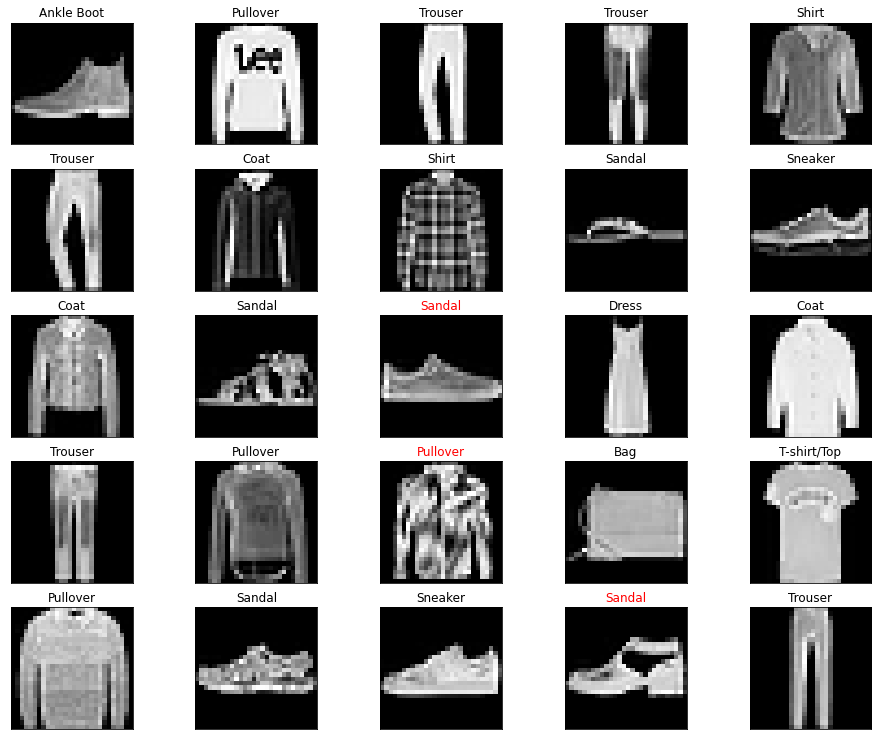

In [66]:
f, ax = plt.subplots(5,5,figsize=(16,13))
i=0
for a in ax.reshape(-1):
    a.imshow(test_images[i], cmap="gray")
    a.set_xticks([])
    a.set_yticks([])
    
    pred = class_names[predictions[i].argmax()]
    real = class_names[test_labels[i]]
    
    if pred == real:
        a.set_title(pred, c="k")
    else:
        a.set_title(pred, c="r")
    i += 1
    
plt.show()

Esto es copiado del tutorial:

Pick a number: 678


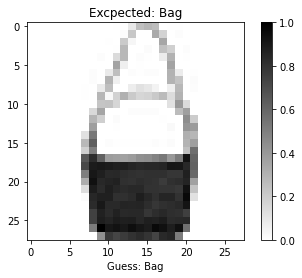

In [69]:
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)